# Phase 1 vs. Phase 2 Volcano Plots

using results from [deseq_p1.v.p2.ipynb](https://github.com/jgmcdonough/CE24_RNA-seq/blob/main/analysis/diff_expression/phase1_v_phase1/deseq_p1.v.p2.ipynb) to generate publication-formatted volcano plots

## 0. load libraries

In [2]:
library(tidyverse) # for ggplot and dplyr
library(cowplot) # to combine plots together

## 1. load CSVs

In [3]:
# W vs. WC
w.wc <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase1_v_phase2/deseq_res_files/p1.w_v_p2.wc.csv')

# H vs. HC
h.hc <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase1_v_phase2/deseq_res_files/p1.h_v_p2.hc.csv')

# B vs. BC
b.bc <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase1_v_phase2/deseq_res_files/p1.b_v_p2.bc.csv')
head(b.bc)

,X,baseMean,log2FoldChange,lfcSE,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,LOC111116054,8.9649962,0.12557253,0.4142338,0.54699637,0.7923436
2,LOC111126949,578.9781781,0.23034780,0.3126920,0.31317540,0.6010471
3,LOC111110729,120.6559774,-0.31627303,0.2171757,0.09487916,0.3065696
4,LOC111112434,7.9890062,-0.07919308,0.4394083,0.67813126,0.8716027
5,LOC111120752,425.5880806,0.48925795,0.2642652,0.02259753,0.1227661
6,LOC111128944,0.3406321,0.00000000,1.2618561,1.00000000,NA


## 2. formatting for ggplot

In [4]:
# create function to assign up- and down-regulated to genes
assign_dir <- function(df) {
    new_df <- df %>%
mutate(
    direction = case_when(
        log2FoldChange > 0.5 & padj <= 0.05 ~ "Up",
        log2FoldChange < 0.5 & padj <= 0.05 ~ "Down",
        TRUE ~ "NS"
        )
    )
    }

In [5]:
# assign direction 
w.wc <- assign_dir(w.wc)
h.hc <- assign_dir(h.hc)
b.bc <- assign_dir(b.bc)

# check
unique(b.bc$direction)
head(b.bc)

[1] "NS"   "Up"   "Down"

,X,baseMean,log2FoldChange,lfcSE,pvalue,padj,direction
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,LOC111116054,8.9649962,0.12557253,0.4142338,0.54699637,0.7923436,NS
2,LOC111126949,578.9781781,0.23034780,0.3126920,0.31317540,0.6010471,NS
3,LOC111110729,120.6559774,-0.31627303,0.2171757,0.09487916,0.3065696,NS
4,LOC111112434,7.9890062,-0.07919308,0.4394083,0.67813126,0.8716027,NS
5,LOC111120752,425.5880806,0.48925795,0.2642652,0.02259753,0.1227661,NS
6,LOC111128944,0.3406321,0.00000000,1.2618561,1.00000000,NA,NS


## 3. DEGs and data summaries

### W vs. WC

In [6]:
w.wc %>%
group_by(direction) %>%
count()

direction,n
<chr>,<int>
Down,407
NS,38089
Up,342


In [34]:
# write csv for only DEGs
w.wc.deg <- w.wc %>%
filter(direction != 'NS')

write.csv(w.wc.deg, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase1_v_phase2/deseq_res_files/DEG.p1.w_v_p2.wc.csv', row.names=FALSE)

### H vs. HC

In [7]:
h.hc %>%
group_by(direction) %>%
count()

direction,n
<chr>,<int>
Down,1734
NS,35963
Up,1141


In [35]:
# write csv for only DEGs
h.hc.deg <- h.hc %>%
filter(direction != 'NS')

write.csv(h.hc.deg, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase1_v_phase2/deseq_res_files/DEG.p1.h_v_p2.hc.csv', row.names=FALSE)

### B vs. BC

In [8]:
b.bc %>%
group_by(direction) %>%
count()

direction,n
<chr>,<int>
Down,1516
NS,35020
Up,2302


In [37]:
# write csv for only DEGs
b.bc.deg <- b.bc %>%
filter(direction != 'NS')

write.csv(b.bc.deg, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase1_v_phase2/deseq_res_files/DEG.p1.b_v_p2.bc.csv', row.names=FALSE)

## 4. ggplot

***Important Note***: In all of these comparisons, the phase 1 oyster is the "control" or baseline, so up/down-regulated refers to the phase 2 oyster in relation to the phase 1 oyster

### warm vs. warm control

Warning message:
“Removed 5618 rows containing missing values or values outside the scale range
(`geom_point()`).”


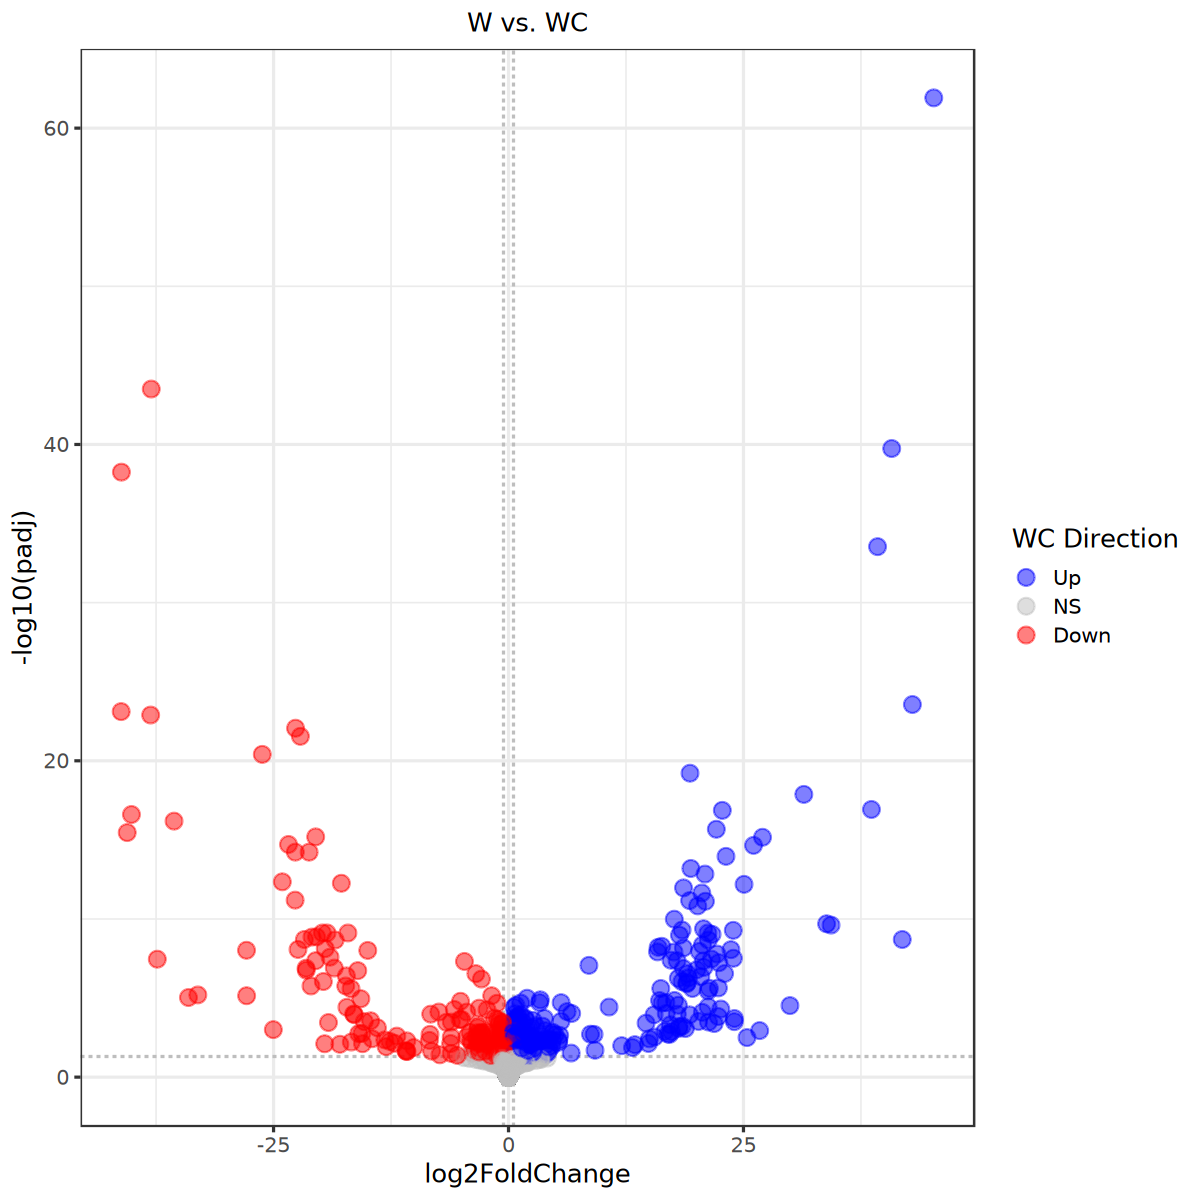

In [9]:
options(repr.plot.width=10, repr.plot.height=10)

# warm vs. warm control
w.wc.plot <- ggplot(data = w.wc, aes(x = log2FoldChange, 
                       y = -log10(padj),
                       col = direction)) +
# fold change threshold line
geom_vline(xintercept = c(-0.5, 0.5), 
           col = "gray",
           linetype = "dashed") +
# adjusted p-value line
geom_hline(yintercept = -log10(0.05),
           col = "gray",
           linetype = "dashed") +
geom_point(size=4, alpha = 0.5) +
scale_color_manual(values=c('red', 'gray', 'blue')) +
theme_bw(base_size = 15) +
labs(subtitle = 'W vs. WC',
     col = 'WC Direction') +
theme(plot.subtitle = element_text(hjust = 0.5)) +
guides(col = guide_legend(reverse = TRUE))

w.wc.plot

### hypoxic vs. hypoxic control

Warning message:
“Removed 6952 rows containing missing values or values outside the scale range
(`geom_point()`).”


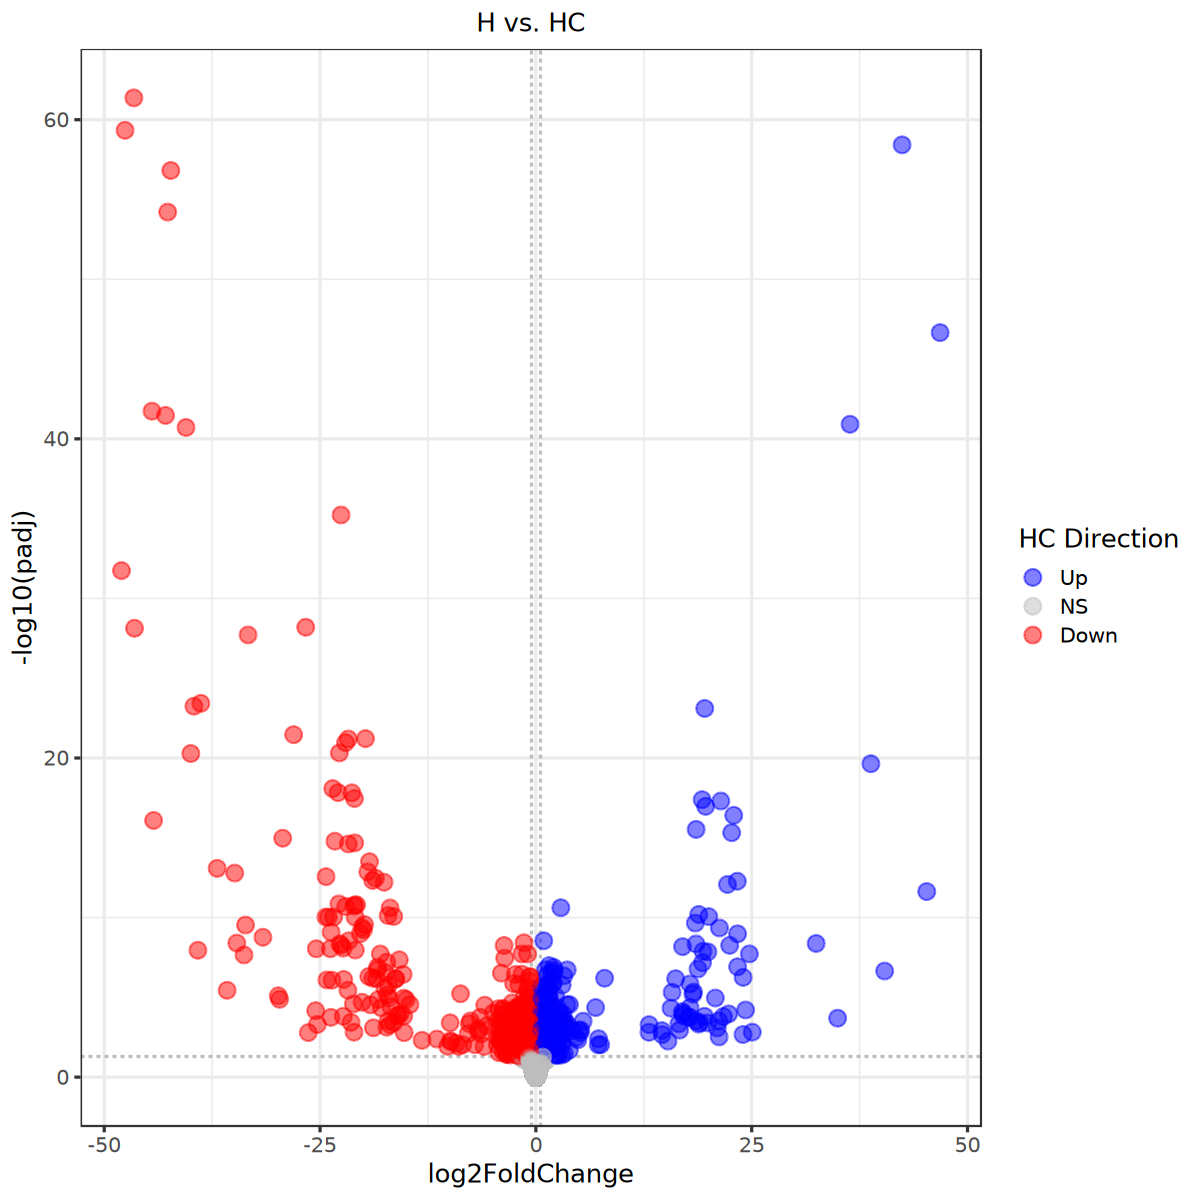

In [10]:
options(repr.plot.width=10, repr.plot.height=10)

# hypoxic vs. hypoxic control
h.hc.plot <- ggplot(data = h.hc, aes(x = log2FoldChange, 
                       y = -log10(padj),
                       col = direction)) +
# fold change threshold line
geom_vline(xintercept = c(-0.5, 0.5), 
           col = "gray",
           linetype = "dashed") +
# adjusted p-value line
geom_hline(yintercept = -log10(0.05),
           col = "gray",
           linetype = "dashed") +
geom_point(size=4, alpha = 0.5) +
scale_color_manual(values=c('red', 'gray', 'blue')) +
theme_bw(base_size = 15) +
labs(subtitle = 'H vs. HC',
     col = 'HC Direction') +
theme(plot.subtitle = element_text(hjust = 0.5)) +
guides(col = guide_legend(reverse = TRUE))

h.hc.plot

### both vs. both control

Warning message:
“Removed 6296 rows containing missing values or values outside the scale range
(`geom_point()`).”


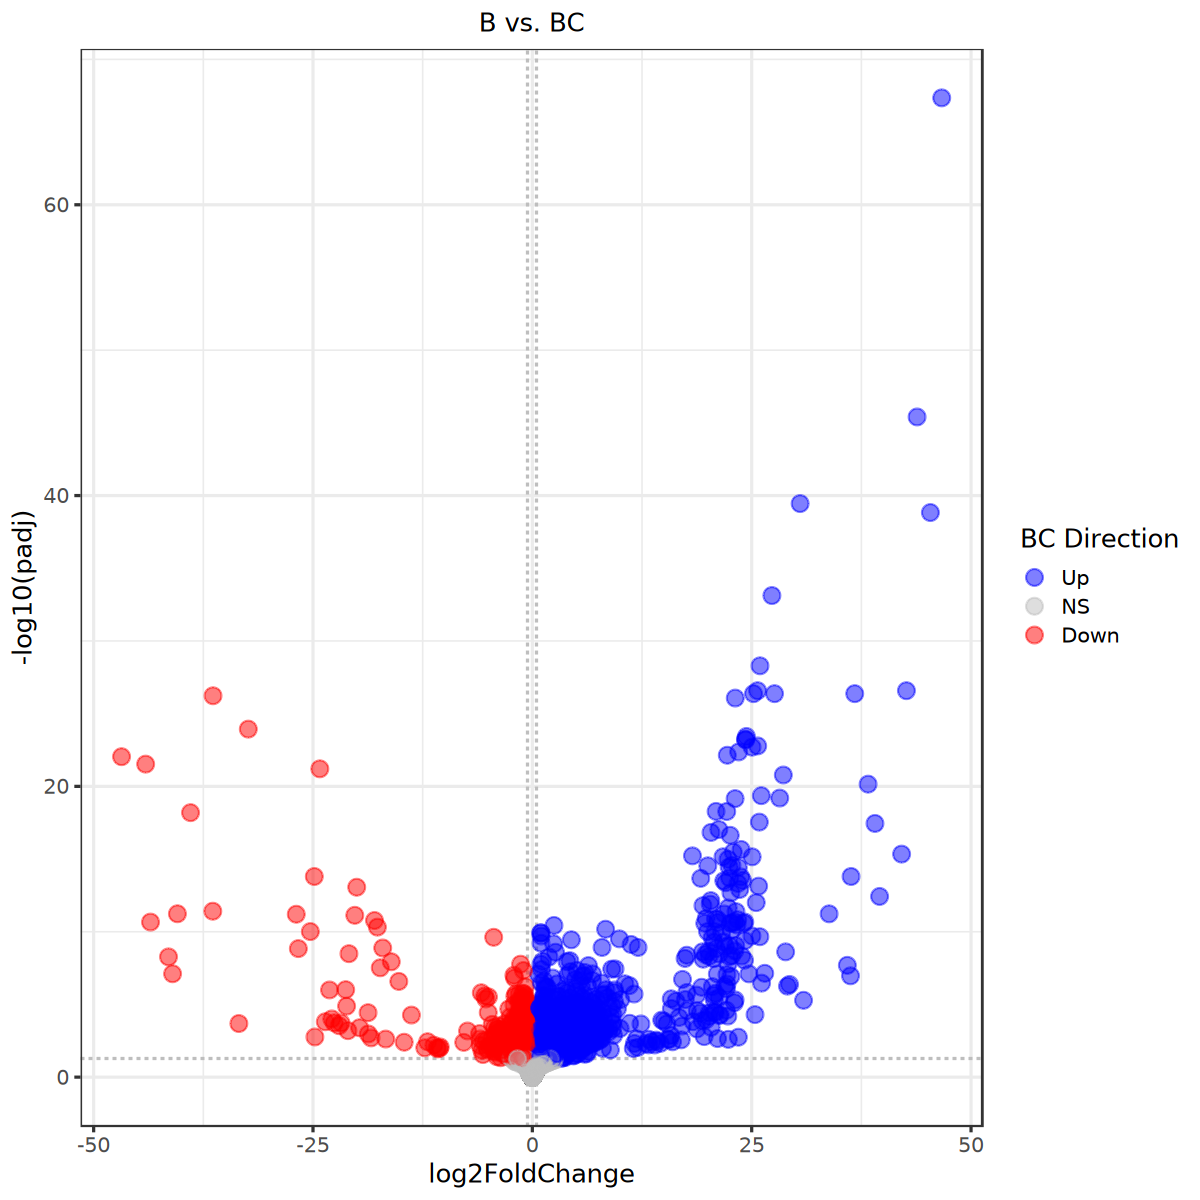

In [11]:
options(repr.plot.width=10, repr.plot.height=10)

# both vs. both control
b.bc.plot <- ggplot(data = b.bc, aes(x = log2FoldChange, 
                       y = -log10(padj),
                       col = direction)) +
# fold change threshold line
geom_vline(xintercept = c(-0.5, 0.5), 
           col = "gray",
           linetype = "dashed") +
# adjusted p-value line
geom_hline(yintercept = -log10(0.05),
           col = "gray",
           linetype = "dashed") +
geom_point(size=4, alpha = 0.5) +
scale_color_manual(values=c('red', 'gray', 'blue')) +
theme_bw(base_size = 15) +
labs(subtitle = 'B vs. BC',
     col = 'BC Direction') +
theme(plot.subtitle = element_text(hjust = 0.5)) +
guides(col = guide_legend(reverse = TRUE))

b.bc.plot

## 4. combining plots

Warning message:
“Removed 5618 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 6952 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 6296 rows containing missing values or values outside the scale range
(`geom_point()`).”


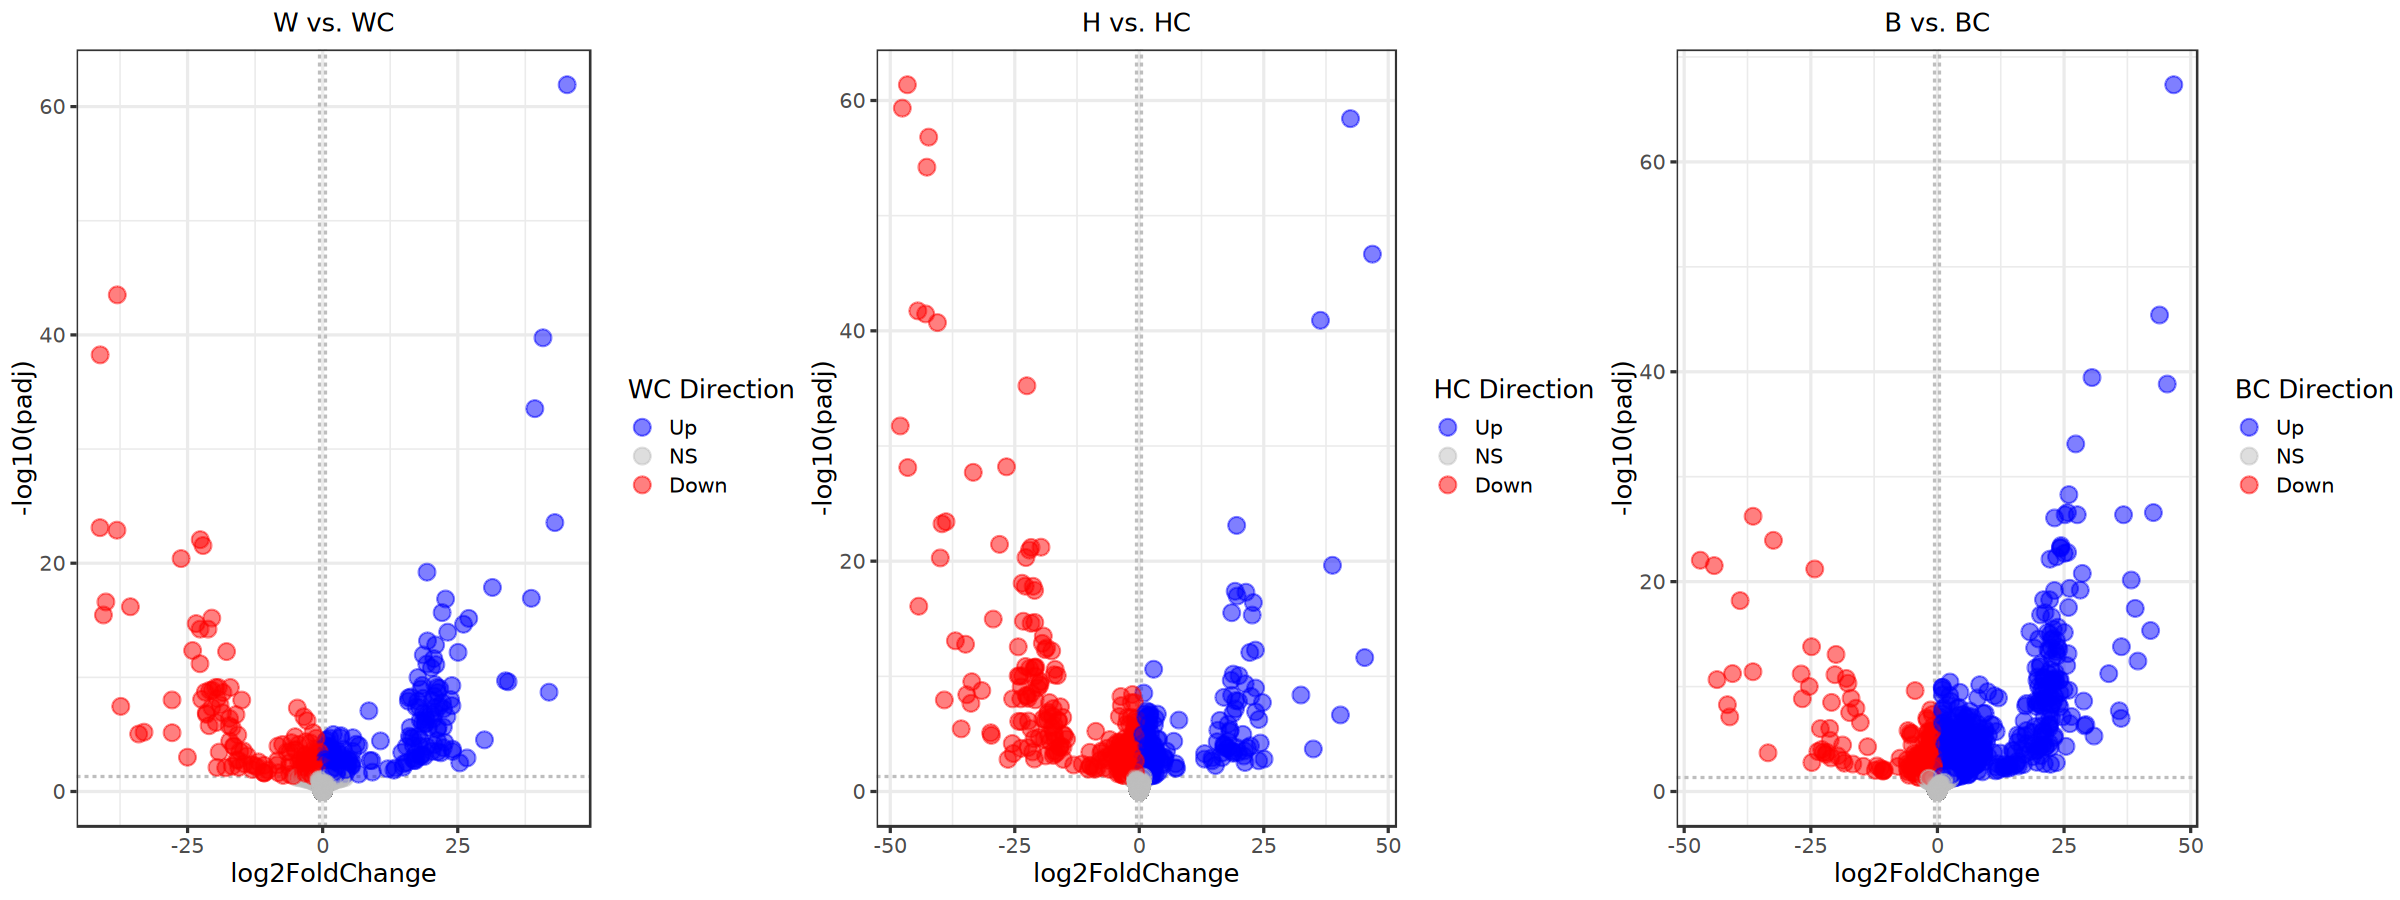

In [12]:
options(repr.plot.width=20, repr.plot.height=7.5)
combined <- plot_grid(w.wc.plot, h.hc.plot, b.bc.plot, ncol = 3, nrow = 1)
combined

In [13]:
ggsave('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase1_v_phase2/plots/combined_volcano.pdf', combined, width=20, height=7.5)